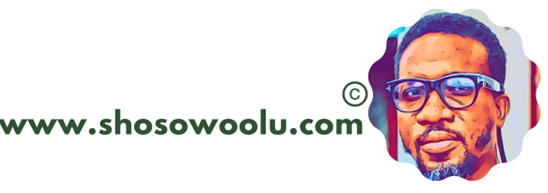

# Pandas Documentation Example Walkthrough Notebook

## Introduction

This notebook is the walkalong from the reading of the Pandas Documentation.

It is used to test/practice all the examples presented in the documentation. 



In [1]:
# Display multiple output in the notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 10 mins to Pandas

In [2]:
import numpy as np
import pandas as pd

**Basic data structures in Pandas**

In [3]:
# Series
# Pandas creates a default `RangeIndex`
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# DataFrame
# Create a DataFrame by passing a NumPy array with a datetime index using `date_range() and labelled columns
dates = pd.date_range('20230101', periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2023-01-01,-0.372695,-0.320114,-0.623867,-1.196272
2023-01-02,-0.275993,-1.367934,-1.220058,-0.461337
2023-01-03,-0.552394,0.316387,1.633851,1.194042
2023-01-04,-0.399065,-0.384168,-0.459428,0.454116
2023-01-05,-2.005547,-0.736195,-0.651072,-0.473817
2023-01-06,-2.554121,-1.771193,1.958138,2.939975


In [6]:
# Create a DataFrame by passing a dictionary of objects where the keys are the column labels and values are column values
df2 = pd.DataFrame(
        {'A': 1.0,
         'B': pd.Timestamp('20230102'),
         'C': pd.Series(1, index=list(range(4)),dtype='float32'),
         'D': np.array([3] * 4, dtype='int32'),
         'E': pd.Categorical(['test', 'train', 'test', 'train']),
         'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [8]:
# Veiw the top of the data
df2.head()

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [9]:
# Veiw the bottom row of the data
df2.tail(2)

,A,B,C,D,E,F
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [10]:
# Display the index
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Display the columns
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Return the underlining NumPy data
# Pandas will find the NumPy dtype that can hold all the dtypes in the DataFrame.
df2.to_numpy()

array([[1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
# Quick statistics of data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-1.026636,-0.710536,0.106261,0.409451
std,0.990084,0.757805,1.337815,1.492508
min,-2.554121,-1.771193,-1.220058,-1.196272
25%,-1.642259,-1.209999,-0.644271,-0.470697
50%,-0.475730,-0.560181,-0.541648,-0.003610
75%,-0.379288,-0.336127,1.110532,1.009060
max,-0.275993,0.316387,1.958138,2.939975


In [14]:
# Transpose the data
df.T

,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06
A,-0.372695,-0.275993,-0.552394,-0.399065,-2.005547,-2.554121
B,-0.320114,-1.367934,0.316387,-0.384168,-0.736195,-1.771193
C,-0.623867,-1.220058,1.633851,-0.459428,-0.651072,1.958138
D,-1.196272,-0.461337,1.194042,0.454116,-0.473817,2.939975


In [15]:
# Sort by axis (column - axis)
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2023-01-01,-1.196272,-0.623867,-0.320114,-0.372695
2023-01-02,-0.461337,-1.220058,-1.367934,-0.275993
2023-01-03,1.194042,1.633851,0.316387,-0.552394
2023-01-04,0.454116,-0.459428,-0.384168,-0.399065
2023-01-05,-0.473817,-0.651072,-0.736195,-2.005547
2023-01-06,2.939975,1.958138,-1.771193,-2.554121


In [16]:
# Sort by Index (row - axis)
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2023-01-06,-2.554121,-1.771193,1.958138,2.939975
2023-01-05,-2.005547,-0.736195,-0.651072,-0.473817
2023-01-04,-0.399065,-0.384168,-0.459428,0.454116
2023-01-03,-0.552394,0.316387,1.633851,1.194042
2023-01-02,-0.275993,-1.367934,-1.220058,-0.461337
2023-01-01,-0.372695,-0.320114,-0.623867,-1.196272


In [17]:
# Sort values
df.sort_values(by='B', ascending=False)

,A,B,C,D
2023-01-03,-0.552394,0.316387,1.633851,1.194042
2023-01-01,-0.372695,-0.320114,-0.623867,-1.196272
2023-01-04,-0.399065,-0.384168,-0.459428,0.454116
2023-01-05,-2.005547,-0.736195,-0.651072,-0.473817
2023-01-02,-0.275993,-1.367934,-1.220058,-0.461337
2023-01-06,-2.554121,-1.771193,1.958138,2.939975


**Selection**

The optimised Pandas data access methods are `Dataframe.at()`, `DataFrame.iat()`, `DataFrame.loc`, `DataFrame.iloc`

In [18]:
# For a DataFrame passing a single label selects a column and yields a 'Series'. Same as df.A (no space allowed in column name)
df['A']

2023-01-01   -0.372695
2023-01-02   -0.275993
2023-01-03   -0.552394
2023-01-04   -0.399065
2023-01-05   -2.005547
2023-01-06   -2.554121
Freq: D, Name: A, dtype: float64

In [19]:
df.A

2023-01-01   -0.372695
2023-01-02   -0.275993
2023-01-03   -0.552394
2023-01-04   -0.399065
2023-01-05   -2.005547
2023-01-06   -2.554121
Freq: D, Name: A, dtype: float64

In [20]:
# for a DataFrame, passing a slice `:` selects matching rows
df[0:3]

,A,B,C,D
2023-01-01,-0.372695,-0.320114,-0.623867,-1.196272
2023-01-02,-0.275993,-1.367934,-1.220058,-0.461337
2023-01-03,-0.552394,0.316387,1.633851,1.194042


In [21]:
# Selecting by row labels
df['20230102':'20230104']

,A,B,C,D
2023-01-02,-0.275993,-1.367934,-1.220058,-0.461337
2023-01-03,-0.552394,0.316387,1.633851,1.194042
2023-01-04,-0.399065,-0.384168,-0.459428,0.454116


In [22]:
# Selecting a row matching a label 
df.loc[dates[0]]

A   -0.372695
B   -0.320114
C   -0.623867
D   -1.196272
Name: 2023-01-01 00:00:00, dtype: float64

In [23]:
# Select all rows with a select column labels
df.loc[ :,['A', 'C']]

,A,C
2023-01-01,-0.372695,-0.623867
2023-01-02,-0.275993,-1.220058
2023-01-03,-0.552394,1.633851
2023-01-04,-0.399065,-0.459428
2023-01-05,-2.005547,-0.651072
2023-01-06,-2.554121,1.958138


In [24]:
# For label slicing, both endpoint are included.
df.loc['20230101':'20230104', ['A','B', "C"]]

,A,B,C
2023-01-01,-0.372695,-0.320114,-0.623867
2023-01-02,-0.275993,-1.367934,-1.220058
2023-01-03,-0.552394,0.316387,1.633851
2023-01-04,-0.399065,-0.384168,-0.459428


In [25]:
# Selecting a single row and column returns a scalar
df.loc[dates[0], "A"]

-0.37269487327889894

In [26]:
# For getting faster access to scalar like above
df.at[dates[0], 'A']

-0.37269487327889894

In [27]:
# Selection by position 
df.iloc[3] #4th row


A   -0.399065
B   -0.384168
C   -0.459428
D    0.454116
Name: 2023-01-04 00:00:00, dtype: float64

In [28]:
# Interger slices similar to NumPy/Python
df.iloc[3:5, 0:3]

,A,B,C
2023-01-04,-0.399065,-0.384168,-0.459428
2023-01-05,-2.005547,-0.736195,-0.651072


In [29]:
# Lists of integer position locations
df.iloc[[1,2,4], [0,2]]

,A,C
2023-01-02,-0.275993,-1.220058
2023-01-03,-0.552394,1.633851
2023-01-05,-2.005547,-0.651072


In [30]:
# Column slicing explicitly
df.iloc[:, 1:3]

,B,C
2023-01-01,-0.320114,-0.623867
2023-01-02,-1.367934,-1.220058
2023-01-03,0.316387,1.633851
2023-01-04,-0.384168,-0.459428
2023-01-05,-0.736195,-0.651072
2023-01-06,-1.771193,1.958138


In [31]:
# Getting a value explicitly
df.iloc[1, 1]

-1.367933703100436

In [32]:
# Get a fast access to a value explicitly (similar outcome to above)
df.iat[1, 1]

-1.367933703100436

**Boolean Indexing**

In [33]:
# Select rows where df.A is greater than 0
df[df['A'] > 0]

,A,B,C,D


In [34]:
# Select values from DataFrame where a boolean condition is met
df[df > 0]

,A,B,C,D
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN
2023-01-03,NaN,0.316387,1.633851,1.194042
2023-01-04,NaN,NaN,NaN,0.454116
2023-01-05,NaN,NaN,NaN,NaN
2023-01-06,NaN,NaN,1.958138,2.939975


In [35]:
# Using `isin` method for filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2023-01-01,-0.372695,-0.320114,-0.623867,-1.196272,one
2023-01-02,-0.275993,-1.367934,-1.220058,-0.461337,one
2023-01-03,-0.552394,0.316387,1.633851,1.194042,two
2023-01-04,-0.399065,-0.384168,-0.459428,0.454116,three
2023-01-05,-2.005547,-0.736195,-0.651072,-0.473817,four
2023-01-06,-2.554121,-1.771193,1.958138,2.939975,three


In [36]:
# The boolean filter
df2['E'].isin(['two', 'four'])

2023-01-01    False
2023-01-02    False
2023-01-03     True
2023-01-04    False
2023-01-05     True
2023-01-06    False
Freq: D, Name: E, dtype: bool

In [37]:
# Applying the boolean filter
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2023-01-03,-0.552394,0.316387,1.633851,1.194042,two
2023-01-05,-2.005547,-0.736195,-0.651072,-0.473817,four


**Setting**

In [38]:
# Setting a new column automatically aligns the data by indexes
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20230102', periods=6))
s1

2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
Freq: D, dtype: int64

In [39]:
df['F'] = s1

In [40]:
# Setting values by label
df.at[dates[0], 'A'] = 0

In [41]:
# Setting values by position
df.iat[0,1] = 0

In [42]:
# Setting value by assigning with a NumPy array
df.loc[:, 'D'] = np.array([5] * len(df))

C:\Users\admin\AppData\Local\Temp\ipykernel_25440\2448912630.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


In [43]:
df

,A,B,C,D,F
2023-01-01,0.000000,0.000000,-0.623867,5,NaN
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0
2023-01-03,-0.552394,0.316387,1.633851,5,2.0
2023-01-04,-0.399065,-0.384168,-0.459428,5,3.0
2023-01-05,-2.005547,-0.736195,-0.651072,5,4.0
2023-01-06,-2.554121,-1.771193,1.958138,5,5.0


In [44]:
# A `where` operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2 #boolean where type filter to set value
df2

,A,B,C,D,F
2023-01-01,0.000000,0.000000,-0.623867,-5,NaN
2023-01-02,-0.275993,-1.367934,-1.220058,-5,-1.0
2023-01-03,-0.552394,-0.316387,-1.633851,-5,-2.0
2023-01-04,-0.399065,-0.384168,-0.459428,-5,-3.0
2023-01-05,-2.005547,-0.736195,-0.651072,-5,-4.0
2023-01-06,-2.554121,-1.771193,-1.958138,-5,-5.0


**Missing Data**

`np.nan` represents missing data in NumPy data type and by default not included in computations

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) +['E'])

In [46]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,-0.623867,5,NaN,1.0
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0,1.0
2023-01-03,-0.552394,0.316387,1.633851,5,2.0,NaN
2023-01-04,-0.399065,-0.384168,-0.459428,5,3.0,NaN


In [47]:
# `DataFrame.dropna()` drops any rows that have missing data
df1.dropna(how='any') # not inplace

,A,B,C,D,F,E
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0,1.0


In [48]:
df1 # the original DataFrame is unchanged

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,-0.623867,5,NaN,1.0
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0,1.0
2023-01-03,-0.552394,0.316387,1.633851,5,2.0,NaN
2023-01-04,-0.399065,-0.384168,-0.459428,5,3.0,NaN


In [49]:
# `DataFrame.fillna()` fills missing data
df1.fillna(value=5) # not inplace 

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,-0.623867,5,5.0,1.0
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0,1.0
2023-01-03,-0.552394,0.316387,1.633851,5,2.0,5.0
2023-01-04,-0.399065,-0.384168,-0.459428,5,3.0,5.0


In [50]:
df1 # original df remains unchanged

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,-0.623867,5,NaN,1.0
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0,1.0
2023-01-03,-0.552394,0.316387,1.633851,5,2.0,NaN
2023-01-04,-0.399065,-0.384168,-0.459428,5,3.0,NaN


In [51]:
# `isna()` gets the boolean mask where values are `nan`
pd.isna(df1)

,A,B,C,D,F,E
2023-01-01,False,False,False,False,True,False
2023-01-02,False,False,False,False,False,False
2023-01-03,False,False,False,False,False,True
2023-01-04,False,False,False,False,False,True


In [52]:
# Carry out the inplace operations
df3 = df1.copy()
df4 = df1.copy()
df3.dropna(how='any', inplace=True)
df4.fillna(value=5, inplace=True)

In [53]:
df3

,A,B,C,D,F,E
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0,1.0


In [54]:
df4

,A,B,C,D,F,E
2023-01-01,0.000000,0.000000,-0.623867,5,5.0,1.0
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0,1.0
2023-01-03,-0.552394,0.316387,1.633851,5,2.0,5.0
2023-01-04,-0.399065,-0.384168,-0.459428,5,3.0,5.0


**Operations**

Operations in general ***exclude*** missing data

In [55]:
# Calculate mean for each column
df.mean() #axis=0 is default

A   -0.964520
B   -0.657184
C    0.106261
D    5.000000
F    3.000000
dtype: float64

In [56]:
# Calculate the mean for each row
df.mean(axis=1)

2023-01-01    1.094033
2023-01-02    0.627203
2023-01-03    1.679569
2023-01-04    1.351468
2023-01-05    1.121437
2023-01-06    1.526565
Freq: D, dtype: float64

Operating with another `Series` or `DataFrame` with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with `np.nan`

In [57]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2023-01-01    NaN
2023-01-02    NaN
2023-01-03    1.0
2023-01-04    3.0
2023-01-05    5.0
2023-01-06    NaN
Freq: D, dtype: float64

In [58]:
df

,A,B,C,D,F
2023-01-01,0.000000,0.000000,-0.623867,5,NaN
2023-01-02,-0.275993,-1.367934,-1.220058,5,1.0
2023-01-03,-0.552394,0.316387,1.633851,5,2.0
2023-01-04,-0.399065,-0.384168,-0.459428,5,3.0
2023-01-05,-2.005547,-0.736195,-0.651072,5,4.0
2023-01-06,-2.554121,-1.771193,1.958138,5,5.0


In [59]:
df.sub(s, axis='index')


,A,B,C,D,F
2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN,NaN
2023-01-03,-1.552394,-0.683613,0.633851,4.0,1.0
2023-01-04,-3.399065,-3.384168,-3.459428,2.0,0.0
2023-01-05,-7.005547,-5.736195,-5.651072,0.0,-1.0
2023-01-06,NaN,NaN,NaN,NaN,NaN


In [60]:
# User defined functions
# `DataFrame.agg()` and `DataFrame.Transform()` applies a user defined function that reduces or broadcast its results respectively.
df.agg(lambda x: np.mean(x) * 5.6)

A    -5.401312
B    -3.680228
C     0.595060
D    28.000000
F    16.800000
dtype: float64

In [61]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2023-01-01,0.000000,0.000000,-63.135390,506.0,NaN
2023-01-02,-27.930463,-138.434891,-123.469819,506.0,101.2
2023-01-03,-55.902239,32.018354,165.345757,506.0,202.4
2023-01-04,-40.385427,-38.877784,-46.494119,506.0,303.6
2023-01-05,-202.961362,-74.502900,-65.888437,506.0,404.8
2023-01-06,-258.477066,-179.244686,198.163563,506.0,506.0


**Value Counts**

In [62]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    0
2    2
3    1
4    6
5    0
6    5
7    4
8    0
9    1
dtype: int32

In [63]:
s.value_counts()

0    3
4    2
1    2
2    1
6    1
5    1
dtype: int64

**String Operations**

`Series` is equipped with set of string processing methods in the `str` attribute.

In [64]:
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2    Aaba
3    Baca
4     NaN
5    CABA
6     dog
7     cat
dtype: object

In [65]:
s.str.lower() # operation is not inplace automatically

0       a
1       b
2    aaba
3    baca
4     NaN
5    caba
6     dog
7     cat
dtype: object

In [66]:
s

0       A
1       B
2    Aaba
3    Baca
4     NaN
5    CABA
6     dog
7     cat
dtype: object

**Merge**

In [67]:
# Uses the set logic for the indexes and relational algebra dunctinality in the case of join/merge-type operations
# Concat() - Concatenating pandas objects together row-wise with concat()
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.318465,-0.072883,-0.525655,-1.966466
1,0.429288,-1.206054,0.366529,0.071960
2,-0.020788,0.878468,-1.147581,0.736967
3,-0.834050,1.332392,0.159559,0.773783
4,-0.423644,-1.396614,1.079003,-1.013094
5,-0.114605,-1.132476,1.857013,1.424755
6,-0.133045,0.697572,0.242806,2.293848
7,0.948434,-1.412154,0.786442,-0.083650
8,1.742164,-0.724360,0.634265,-0.122250
9,0.235619,0.053110,0.832227,0.419601


In [68]:
# Break the df into piece
pieces= [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.318465 -0.072883 -0.525655 -1.966466
 1  0.429288 -1.206054  0.366529  0.071960
 2 -0.020788  0.878468 -1.147581  0.736967,
           0         1         2         3
 3 -0.834050  1.332392  0.159559  0.773783
 4 -0.423644 -1.396614  1.079003 -1.013094
 5 -0.114605 -1.132476  1.857013  1.424755
 6 -0.133045  0.697572  0.242806  2.293848,
           0         1         2         3
 7  0.948434 -1.412154  0.786442 -0.083650
 8  1.742164 -0.724360  0.634265 -0.122250
 9  0.235619  0.053110  0.832227  0.419601]

In [69]:
pd.concat(pieces)

,0,1,2,3
0,0.318465,-0.072883,-0.525655,-1.966466
1,0.429288,-1.206054,0.366529,0.071960
2,-0.020788,0.878468,-1.147581,0.736967
3,-0.834050,1.332392,0.159559,0.773783
4,-0.423644,-1.396614,1.079003,-1.013094
5,-0.114605,-1.132476,1.857013,1.424755
6,-0.133045,0.697572,0.242806,2.293848
7,0.948434,-1.412154,0.786442,-0.083650
8,1.742164,-0.724360,0.634265,-0.122250
9,0.235619,0.053110,0.832227,0.419601


Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. It is recommended to pass a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appendding records to it.

**Join**

In [70]:
# merge() enables SQL style join types along specific columns
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [71]:
left

,key,lval
0,foo,1
1,foo,2


In [72]:
right

,key,rval
0,foo,4
1,foo,5


In [73]:
pd.merge(left, right, on='key') # keys are not unique

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [74]:
# merge on unique keys
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [75]:
left

,key,lval
0,foo,1
1,bar,2


In [76]:
right

,key,rval
0,foo,4
1,bar,5


In [77]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


**Grouping**

`groupby` involves one or more of the following process:
    
   * **Splitting** the data into group based on some criteria
   * **Applying** a functions to each group independently
   * **Combining** the results into a data structure

In [78]:
df = pd.DataFrame(
    {
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar','foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    }
)
    
df

,A,B,C,D
0,foo,one,-0.196384,0.930448
1,bar,one,2.689022,1.205907
2,foo,two,0.571435,0.019322
3,bar,three,-0.406351,-1.233732
4,foo,two,0.401215,0.455570
5,bar,two,-0.628903,-1.078981
6,foo,one,0.516155,-0.561612
7,foo,three,-0.381566,-0.097461


In [79]:
# Group by column label, selecting column labels and applying the sum() function to the resulting groups
df.groupby('A')[['C', 'D']].sum()

,C,D
A,,
bar,1.653769,-1.106806
foo,0.910856,0.746266


In [80]:
# Grouping by multiple columns label forms MultiIndex
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    2.689022  1.205907
    three -0.406351 -1.233732
    two   -0.628903 -1.078981
foo one    0.319771  0.368836
    three -0.381566 -0.097461
    two    0.972650  0.474892

**Reshaping**

**Stack**

In [81]:
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],
]

In [82]:
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

In [83]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [84]:
df

A         B
first second                    
bar   one    -0.072113 -0.199379
      two     0.227322  0.310822
baz   one    -2.095265  1.230347
      two    -1.522249  0.261432
foo   one    -1.103284  0.118586
      two    -0.777293  0.071656
qux   one     0.144094 -0.653295
      two     1.945055 -0.977902

In [85]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.072113 -0.199379
      two     0.227322  0.310822
baz   one    -2.095265  1.230347
      two    -1.522249  0.261432

In [86]:
# `stack()` method "compresses" a level in the DataFrame's column
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.072113
               B   -0.199379
       two     A    0.227322
               B    0.310822
baz    one     A   -2.095265
               B    1.230347
       two     A   -1.522249
               B    0.261432
dtype: float64

In [87]:
# With a "stacked" DataFrame or Series having a `MultiIndex` as the index, the inverse operations of `stack()` is `unstack()` - which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.072113 -0.199379
      two     0.227322  0.310822
baz   one    -2.095265  1.230347
      two    -1.522249  0.261432

In [88]:
# unstack the second level
stacked.unstack(1)

second        one       two
first                      
bar   A -0.072113  0.227322
      B -0.199379  0.310822
baz   A -2.095265 -1.522249
      B  1.230347  0.261432

In [89]:
# Unstack the first level
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.072113 -2.095265
       B -0.199379  1.230347
two    A  0.227322 -1.522249
       B  0.310822  0.261432

**Pivot Table**

In [90]:
df = pd.DataFrame(
{
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A', 'B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randn(12),
    'E': np.random.randn(12)
})

df

,A,B,C,D,E
0,one,A,foo,1.320398,-0.743103
1,one,B,foo,0.096019,-1.256703
2,two,C,foo,1.037375,0.533204
3,three,A,bar,-0.190340,-1.119779
4,one,B,bar,0.250233,1.264255
5,one,C,bar,1.459205,-0.660981
6,two,A,foo,0.895705,-0.584957
7,three,B,foo,-1.550223,1.248776
8,one,C,foo,0.984506,0.323801
9,one,A,bar,-0.336271,-0.007992


In [91]:
# `pivot_table()` pivots a DataFrame specifying the `values`, `index` and `columns`
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.336271  1.320398
      B  0.250233  0.096019
      C  1.459205  0.984506
three A -0.190340       NaN
      B       NaN -1.550223
      C  1.228163       NaN
two   A       NaN  0.895705
      B -0.099243       NaN
      C       NaN  1.037375

**Time Series**

Pandas has simple, powerful and efficient functionality for performing resampling operations during frequency conversion (e.g converting secondly data into 5-minutely data. This is extremely common in, but not limited to, financial applications.)

In [92]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [93]:
ts

2012-01-01 00:00:00    210
2012-01-01 00:00:01    131
2012-01-01 00:00:02    131
2012-01-01 00:00:03    243
2012-01-01 00:00:04     31
                      ... 
2012-01-01 00:01:35    275
2012-01-01 00:01:36    361
2012-01-01 00:01:37      5
2012-01-01 00:01:38    310
2012-01-01 00:01:39     44
Freq: S, Length: 100, dtype: int32

In [94]:
ts.resample('5Min').sum()

2012-01-01    23563
Freq: 5T, dtype: int32

In [95]:
# `Series.tz_localize()` localizes a time series to a time zone:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.477449
2012-03-07    0.310280
2012-03-08   -2.625679
2012-03-09   -0.108410
2012-03-10    1.911820
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')

In [97]:
ts_utc

2012-03-06 00:00:00+00:00    0.477449
2012-03-07 00:00:00+00:00    0.310280
2012-03-08 00:00:00+00:00   -2.625679
2012-03-09 00:00:00+00:00   -0.108410
2012-03-10 00:00:00+00:00    1.911820
Freq: D, dtype: float64

`Series.tz_convert()` converts a timezones aware time series to another time zone:

In [98]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.477449
2012-03-06 19:00:00-05:00    0.310280
2012-03-07 19:00:00-05:00   -2.625679
2012-03-08 19:00:00-05:00   -0.108410
2012-03-09 19:00:00-05:00    1.911820
Freq: D, dtype: float64

In [99]:
# Adding a non-fixed duration `BusinessDay` to a time series:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [100]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

**Categorical**

In [101]:
# Pandas can include categorical data in a DatFrame
df = pd.DataFrame(
    {
        'id': [1, 2, 3, 4, 5, 6], 
        'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']
    })

In [102]:
# Converting the raw grades to a categorical data type
df['grade'] = df['raw_grade'].astype('category')

In [103]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [104]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [105]:
# Rename the categories to a more meaningful names:
new_categories = ['very good', 'good', 'very bad']

df['grade'] = df['grade'].cat.rename_categories(new_categories)

In [106]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [107]:
# Reorder the categories and simultaneously add the missing categories
# Methods under `Series.cat()` return a new `Series` by default

df['grade'] = df['grade'].cat.set_categories(
                            ['very bad', 'bad', 'medium', 'good', 'very good']
                            )

In [108]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [109]:
# Sorting is per order in the categories, not lexical order
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [110]:
# Grouping by a categorical column with `observed=False` also shows empty categories

In [111]:
df.groupby('grade', observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

**Ploting**

In [112]:
# We use the standard convention for referencing the matplotlib API
import matplotlib.pyplot as plt

plt.close('all') # Yhe `plt.close` method is used to close a figure window


In [113]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.766488
2000-01-02    1.825081
2000-01-03    0.232533
2000-01-04   -0.707147
2000-01-05    2.292979
                ...   
2002-09-22    1.217290
2002-09-23    0.977292
2002-09-24   -1.387421
2002-09-25   -0.325908
2002-09-26   -0.141807
Freq: D, Length: 1000, dtype: float64

<Axes: >

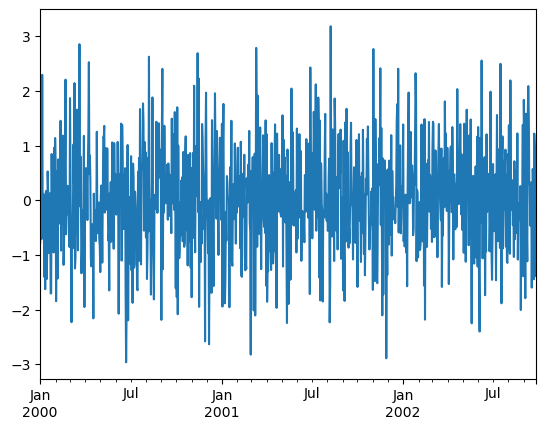

In [114]:
ts.plot()

In [115]:
ts = ts.cumsum()

<Axes: >

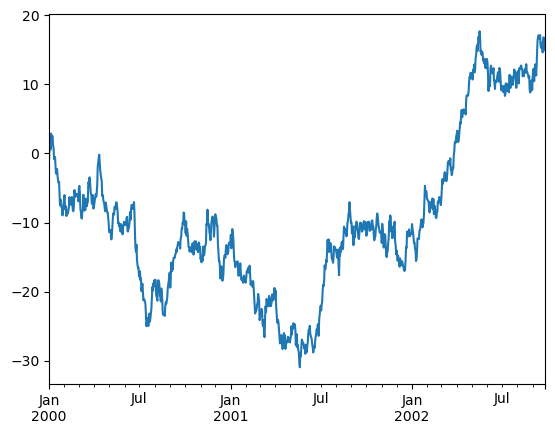

In [116]:
ts.plot()

When using Jupyter, the plot will appear using `plot()`. Otherwise use `matplotlib.pyplot.show` to show it or `matplotlib.pyplot.savefig` to write it to a file.

`plot()` plots all columns

In [117]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,-0.075961,-0.588115,0.646091,-0.808280
2000-01-02,-1.860034,-0.338629,0.348869,-1.057175
2000-01-03,-1.910228,1.024990,1.206109,1.284426
2000-01-04,-0.812774,-1.257177,-0.880445,-0.651801
2000-01-05,0.231993,1.504363,1.099915,1.687359
...,...,...,...,...
2002-09-22,0.697662,1.088159,0.353005,1.099543
2002-09-23,-0.425538,-0.783625,0.171697,0.520116
2002-09-24,-1.175195,-0.472301,0.516439,-1.724727
2002-09-25,-0.745280,-0.520443,-0.501449,1.468502


In [118]:
df = df.cumsum()

In [119]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

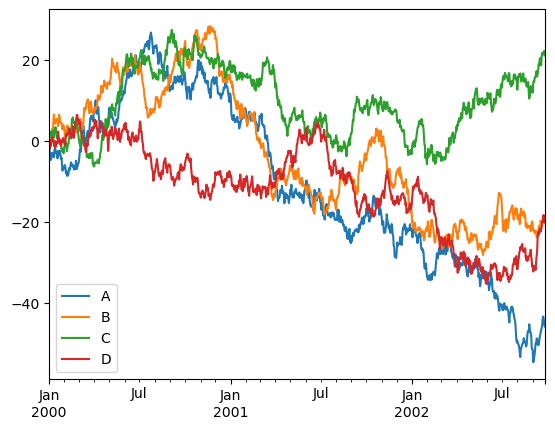

In [120]:
df.plot()
plt.legend(loc='best');

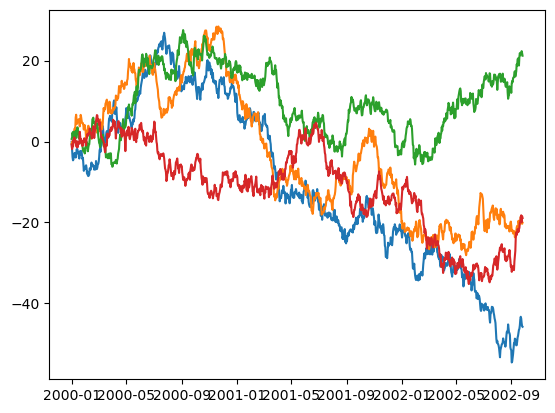

In [121]:
# Plot using matplotib directly to compare
plt.plot(df);

**Importing and Exporting Data**

**CSV**

In [122]:
# Writing to a CSV file using `DataFrame.to_csv()`
df = pd.DataFrame(np.random.randint(0, 5, size=(10, 5)), columns =['A', 'B', 'C', 'D', 'E'])

In [123]:
# Write to csv file
df.to_csv('data/foo.csv', index=False)

In [124]:
# Read from a csv file using `DataFrame.read_csv()
df2 = pd.read_csv('data/foo.csv')
df2

,A,B,C,D,E
0,0,3,2,1,0
1,0,1,1,2,0
2,2,0,1,3,1
3,1,2,2,0,1
4,1,2,2,1,0
5,4,4,0,0,4
6,2,0,3,0,2
7,0,2,4,1,0
8,0,2,4,2,2
9,3,4,0,3,1


**Parquet**

In [125]:
# Writing to a Parquet file using `DataFrame.to_parquet()`
df.to_parquet('data/foo.parquet')

In [126]:
# Read from Parquet file using `DataFrame.read_parquet`
df3 = pd.read_parquet('data/foo.parquet')
df3

,A,B,C,D,E
0,0,3,2,1,0
1,0,1,1,2,0
2,2,0,1,3,1
3,1,2,2,0,1
4,1,2,2,1,0
5,4,4,0,0,4
6,2,0,3,0,2
7,0,2,4,1,0
8,0,2,4,2,2
9,3,4,0,3,1


**Excel**

In [127]:
# Write to excel using 'DataFrame.to_excel()'
df.to_excel('data/foo.xlsx', sheet_name='Sheet1', index=False)

In [128]:
# Read an excel file to DataFrame
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D,E
0,0,3,2,1,0
1,0,1,1,2,0
2,2,0,1,3,1
3,1,2,2,0,1
4,1,2,2,1,0
5,4,4,0,0,4
6,2,0,3,0,2
7,0,2,4,1,0
8,0,2,4,2,2
9,3,4,0,3,1


### Intro to Data Structures

In [133]:
#%ismagic

Fundamentally , **data alignment is intrinsic.** The link between labels and data will not be broken unless done so explicitly.

In [135]:
import numpy as np
import pandas as pd

**Series**

Capable of holding any data type (integers, strings, floating point numbers, Python objects etc) The axis labels collectively referred to as the **index**

Method to create is to call:
`pd.Series(data, index=index)`

`data` can be many different things: 

* a Python dict
* an ndarray
* a scalar value (e.g 5)

***From ndarray***

In [138]:
# if `data` is an ndarray, index must be the same length as the data. If no index is passed, one is created having the values [0,..., len(data) -1]

s = pd.Series(np.random.randn(5), index = ['a', 'b', 'c', 'd', 'e'])
s

a    0.771242
b    1.073754
c   -2.175554
d   -1.482495
e    0.605634
dtype: float64

In [140]:
# Check the index  object
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [141]:
# Create without index
s = pd.Series(np.random.randn(5))
s

0   -0.069791
1    0.755502
2    1.331305
3    0.081722
4    0.894349
dtype: float64

>Pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.

***From dict***

In [145]:
# From dict
d = {'b': 1, 'd': 0, 'a': 7}

pd.Series(d)


b    1
d    0
a    7
dtype: int64

In [146]:
# if an index is passed, the value in data corresponding to the labels in the index will be pulled out
d = {'b': 1, 'd': 0, 'a': 7}

pd.Series(d, index =['b', 'a'])

b    1
a    7
dtype: int64

In [148]:
# when item in the index list is not in dict, the index is added with NaN value
pd.Series(d, index =['b', 'a', 'e', 'f'])

b    1.0
a    7.0
e    NaN
f    NaN
dtype: float64

***From scalar value***

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**


In [149]:
pd.Series(5.0, index=['a', 'b', 'c', 'e'])

a    5.0
b    5.0
c    5.0
e    5.0
dtype: float64

**Series is ndarray-like**

`Series` acts very similar to a `ndarray` and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [150]:
s

0   -0.069791
1    0.755502
2    1.331305
3    0.081722
4    0.894349
dtype: float64

In [151]:
s.iloc[0]

-0.06979055316475452

In [152]:
s.iloc[:3]

0   -0.069791
1    0.755502
2    1.331305
dtype: float64

In [153]:
s[s > s.median()]

2    1.331305
4    0.894349
dtype: float64

In [155]:
s.iloc[[4, 3, 1]] # array-based indexing

4    0.894349
3    0.081722
1    0.755502
dtype: float64

In [156]:
np.exp(s)

0    0.932589
1    2.128680
2    3.785979
3    1.085154
4    2.445742
dtype: float64

Like the NumPy array, a pandas `Series` has a single `dtype`. 

while `Sereis` is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()


In [157]:
s.to_numpy

<bound method IndexOpsMixin.to_numpy of 0   -0.069791
1    0.755502
2    1.331305
3    0.081722
4    0.894349
dtype: float64>

**Series is dict-like**

A `Series` is also like a fixed-size dict in that you can get and set values by index label

In [158]:
s[2]

1.3313045823914404

In [159]:
# set the value using label(index)
s[2] = 4

In [160]:
s[2]

4.0

In [161]:
s

0   -0.069791
1    0.755502
2    4.000000
3    0.081722
4    0.894349
dtype: float64

In [162]:
2 in s

True

In [163]:
7 in s

# if a label is not contained in the index, an exception is raised

False

In [165]:
s[7]

KeyError: 7

In [166]:
# Using the `Series.get() method, a missing label will return None or specified default:

s.get(7)

In [170]:
s.get(7, np.nan)

# These labels can also be accessed by `attribute`

nan